In [8]:
#Import Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
import datetime as date
import matplotlib.patches as mpatches
from sklearn import linear_model


In [9]:
# Read data from file 'filename.csv' 
df = pd.read_csv("azd.csv") 

# Preview the first 10 lines of the loaded data 
df.head(10)

,priceDate,itemName,state,mandiName,arrivals,unitArrivals,variety,minPrice,maxPrice,modalPrice,priceUnit
0,2005-04-11,Potato,NCT of Delhi,Azadpur,106.0,Tonnes,F.A.Q.,300.0,663.0,475.0,Rs/Quintal
1,2005-04-12,Potato,NCT of Delhi,Azadpur,1745.0,Tonnes,F.A.Q.,325.0,688.0,500.0,Rs/Quintal
2,2005-04-13,Potato,NCT of Delhi,Azadpur,1233.0,Tonnes,F.A.Q.,300.0,688.0,488.0,Rs/Quintal
3,2005-04-16,Potato,NCT of Delhi,Azadpur,1654.0,Tonnes,F.A.Q.,350.0,650.0,475.0,Rs/Quintal
4,2005-04-18,Potato,NCT of Delhi,Azadpur,26.0,Tonnes,F.A.Q.,350.0,650.0,475.0,Rs/Quintal
5,2005-04-19,Potato,NCT of Delhi,Azadpur,1436.0,Tonnes,F.A.Q.,313.0,675.0,475.0,Rs/Quintal
6,2005-04-20,Potato,NCT of Delhi,Azadpur,1374.0,Tonnes,F.A.Q.,344.0,688.0,450.0,Rs/Quintal
7,2005-04-21,Potato,NCT of Delhi,Azadpur,1530.0,Tonnes,F.A.Q.,350.0,688.0,450.0,Rs/Quintal
8,2005-04-22,Potato,NCT of Delhi,Azadpur,1300.0,Tonnes,F.A.Q.,350.0,675.0,475.0,Rs/Quintal
9,2005-04-23,Potato,NCT of Delhi,Azadpur,1974.0,Tonnes,F.A.Q.,350.0,675.0,450.0,Rs/Quintal


In [10]:
# Encoding the date into number it's because we can not use date as input(featrue)
# in machine learning.
X = pd.to_datetime(df['priceDate'])
X = X.map(date.datetime.toordinal)

# Fetching the prices of Dataframe "df" which are "maxPrice", "minPrice"
# and "modalPrice" into "y1", "y2", "y3" consecutively

y1 = df.maxPrice
y2 = df.minPrice
y3 = df.modalPrice

# Rplaceing the "NULL" value with "0.0" for all prices which are 
# available into "y1", "y2", "y3".
y1 = y1.fillna(0.0)
y2 = y2.fillna(0.0)
y3 = y3.fillna(0.0)

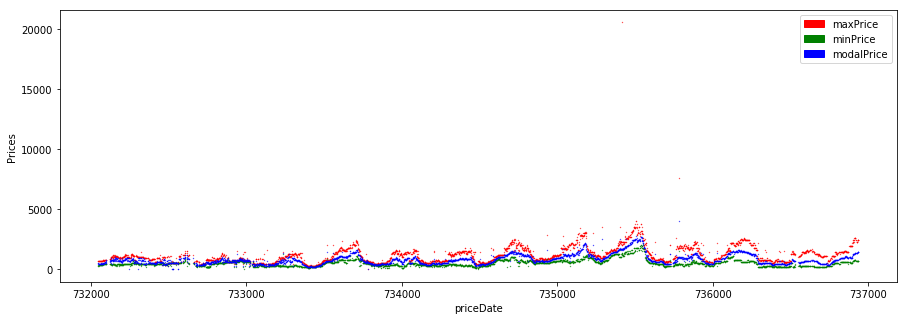

In [11]:
# Scattering all dataset in one graph with different color
# Red-maxPrice
# Green-minPrice
# Blue-modalPrice
plt.figure(figsize=(15,5))
plt.scatter(X,y1,c = 'r', s = .1)
plt.scatter(X,y2,c = 'g' ,s = .1)
plt.scatter(X,y3,c = 'b' ,s = .1)
plt.ylabel('Prices')
plt.xlabel('priceDate'); 
r_patch = mpatches.Patch(color='r', label='maxPrice')
g_patch = mpatches.Patch(color='g', label='minPrice')
b_patch = mpatches.Patch(color='b', label='modalPrice')
plt.legend(handles=[r_patch,g_patch,b_patch])
plt.show()

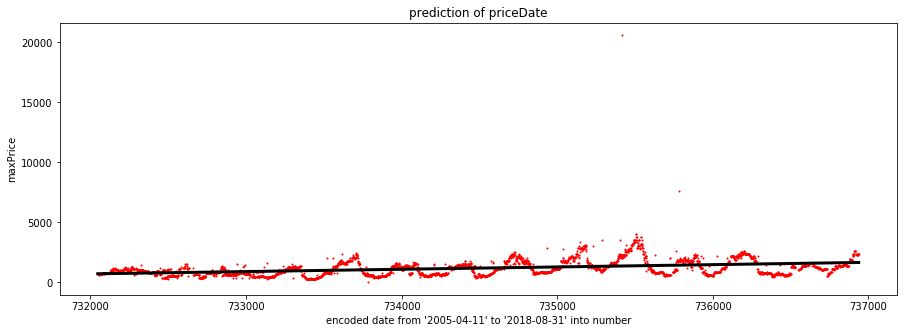

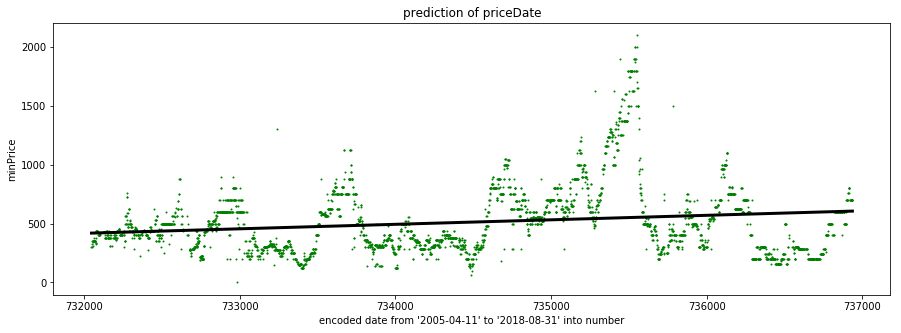

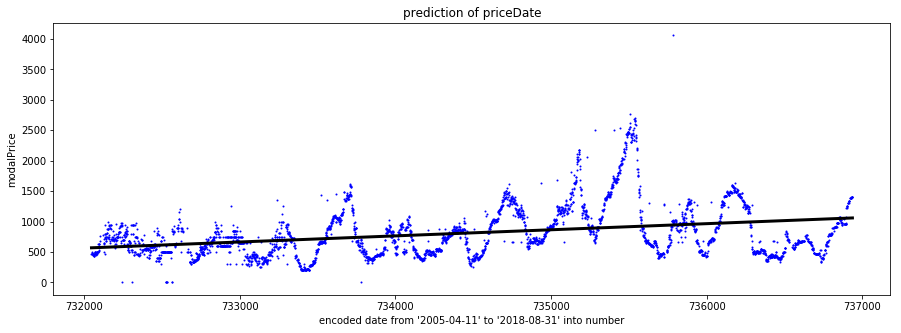

In [12]:
# Expand the size of graph
plt.figure(figsize=(15,5))

# Scatter the dataset of "maxPrice in red" color
plt.scatter(X, y1, color='r', s = 1,)

# Reshape the training it's because our dataset must be in multi-dimensional to train the model.
X = np.array(X)
X = X.reshape(-1,1)

y1 = np.array(y1)
y1 = y1.reshape(-1,1)

# Create the model
model_maxPrice = linear_model.LinearRegression()

# Fit the model in trianing dataset.
model_maxPrice.fit(X, y1)

plt.title('prediction of priceDate')
plt.xlabel("encoded date from '2005-04-11' to '2018-08-31' into number")
plt.ylabel('maxPrice')
plt.plot(X,model_maxPrice.predict(X), c='k',linewidth=3)
plt.show()
print("\n\n")





# Expand the size of graph
plt.figure(figsize=(15,5))

# Scatter the dataset of "maxPrice in red" color
plt.scatter(X, y2, color='g', s = 1,)

y2 = np.array(y2)
y2 = y2.reshape(-1,1)

# Create the model
model_minPrice = linear_model.LinearRegression()

# Fit the model in trianing dataset.
model_minPrice.fit(X, y2)
plt.title('prediction of priceDate')
plt.xlabel("encoded date from '2005-04-11' to '2018-08-31' into number")
plt.ylabel('minPrice')
plt.plot(X,model_minPrice.predict(X), c='k',linewidth=3)
plt.show()
print("\n\n")




# Expand the size of graph
plt.figure(figsize=(15,5))

# Scatter the dataset of "maxPrice in red" color
plt.scatter(X, y3, color='b', s = 1,)
# Create the model
model_modalPrice = linear_model.LinearRegression()

# Fit the model in trianing dataset.
model_modalPrice.fit(X, y3)
plt.title('prediction of priceDate')
plt.xlabel("encoded date from '2005-04-11' to '2018-08-31' into number")
plt.ylabel('modalPrice')
plt.plot(X,model_modalPrice.predict(X), c='k',linewidth=3)
plt.show()

In [13]:
# Gnenrateing the date after "2018-08-31". 
start_date= date.datetime(2018, 9, 1)
end_date = date.datetime(2018, 9, 30)
new_month = pd.date_range(start_date, end_date)

# Encoding the date into number.
pred_x = pd.to_datetime(new_month)
pred_x = pred_x.map(date.datetime.toordinal)

# Reshaping the month.
pred_x = np.array(pred_x)
pred_x = pred_x.reshape(-1,1)

In [14]:
# Predicting the Price
predicted_maxPrice = model_maxPrice.predict(pred_x)
predicted_minPrice = model_minPrice.predict(pred_x)
predicted_modalPrice = model_modalPrice.predict(pred_x)

In [15]:
# Writing the results in csv file "predictedPrice.csv"
with open('PredictedPrice.csv','w') as f:
    writer = csv.writer(f)
    writer.writerow(['priceDate', 'maxPrice', 'minPrice', 'modalPrice'])
    writer.writerows(zip(new_month, np.reshape(predicted_maxPrice, (1,np.product(predicted_maxPrice.shape)))[0],
                                    np.reshape(predicted_minPrice, (1,np.product(predicted_minPrice.shape)))[0], 
                                    np.reshape(predicted_modalPrice, (1,np.product(predicted_modalPrice.shape)))[0]))
print("File has been created sucessfully and saved in Present Working Directory.")    

File has been created sucessfully and saved in Present Working Directory.
